<a href="https://colab.research.google.com/github/Alenushka2013/ML_for_people_lectures/blob/main/Lecture_2_1_8_Mathematical_formulation_of_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лінійна регресія — це статистичний метод, що використовується для моделювання залежності між однією або кількома незалежними змінними (пояснювальними змінними) та залежною змінною (цільовою змінною). Цей метод є основним у машинному навчанні для прогнозування та аналізу даних. Ось основні математичні компоненти лінійної регресії:

# Формулювання задачі лінійної регресії

Математично, лінійна регресія виражається через рівняння:
$$ y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n + \epsilon $$
де:
- $ y $ — залежна змінна, яку ми намагаємося передбачити;
- $ x_1, x_2, ..., x_n $ — незалежні змінні (перемінні, за допомогою яких ми робимо прогноз);
- $ \theta_0, \theta_1, ..., \theta_n $ — параметри моделі, які необхідно оцінити;
- $ \epsilon $ — термін похибки, який враховує будь-яку помилку або невизначеність в моделі.

![](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*hyLYndpTh6g5C8RE-dD7_Q.png)

## Функція гіпотези (Hypothesis Function)

Функція гіпотези в лінійній регресії описує припущення про форму залежності між незалежними і залежною змінними. Вона визначається як:
$$ h_\theta(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n $$
де $ h_\theta(x) $ — прогнозоване значення залежної змінної для даного набору вхідних значень $ x $ та параметрів $ \theta $.

## Функція втрат (Loss Function)

Функція втрат вимірює, наскільки добре функція гіпотези відповідає навчальним даним. Вона оцінює різницю між прогнозованими значеннями моделі та актуальними даними. У лінійній регресії зазвичай використовується функція втрат суми квадратів різниці:

$$ L(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2
\\
= \frac{1}{2m} [(h_\theta(x^{(1)}) - y^{(1)})^2 + (h_\theta(x^{(2)}) - y^{(2)})^2 + ... + (h_\theta(x^{(m)}) - y^{(m)})^2]   $$

де $ m $ — кількість точок даних, $ x^{(i)} $ — вектор вхідних значень i-тої точки даних, а $ y^{(i)} $ — фактичне значення залежної змінної для i-тої точки даних.



In [1]:
average_error = 10
m1 = 100
small_data_error = 10 * m1
m2 = 1000
big_data_error = 10 * m2
small_data_error, big_data_error

(1000, 10000)

In [2]:
# if we divide on m
small_data_error/m1, big_data_error/m2

(10.0, 10.0)



## Матрична нотація (Matrix Notation)
Для обробки кількох змінних та точок даних ми використовуємо матричну нотацію:
- $ X $ — це матриця дизайну (design matrix), яка містить вхідні характеристики. Кожен рядок відповідає точці даних, а кожен стовпець — характеристиці. Додається стовпець одиниць для перехоплення $ \theta_0 $.
- $ y $ — це вектор спостережуваних значень залежної змінної.
- $ \theta $ — це вектор коефіцієнтів, включаючи перехоплення.

Рівняння моделі, використовуючи матричну нотацію, є:
$$ y = X \theta + \epsilon $$

При цьому функція втрат матиме наступний вигляд у матричній нотації:
$$ L = (y - X \theta)^T (y - X \theta) $$


![](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*qBCYkO1Al0vj1s3QvqdhSA.png)

In [3]:
import numpy as np

err = np.array([0.1, 0.2, 0.3])
np.dot(err,err)

np.float64(0.14)

**НАША ЗАДАЧА - МІНІМІЗУВАТИ ФУНКЦІЮ ВТРАТ**
Ми прагнемо мінімізувати суму квадратів резидуалів, що є квадратною різницею між спостережуваними значеннями та тими, що передбачені моделлю.


# Припущення лін. регресії

Цей метод має кілька ключових припущень, кожне з яких спрощує моделювання і дозволяє використовувати лінійні алгебраїчні методи для знаходження рішень. Припущення наступні:

## Незалежність спостережень
Всі спостереження є незалежними одне від одного.

## Лінійний звʼязок між залежною і незалежними змінними

Це припущення, що залежна змінна $ Y $ є лінійною функцією незалежних змінних $ X $ плюс випадкова помилка $ \epsilon $:

$$ Y = \theta_0 + \theta_1X_1 + \theta_2X_2 + \dots + \theta_nX_n + \epsilon $$

де $ \theta_i $ є параметрами моделі, які потрібно оцінити.

**Чому важливо**: Лінійність гарантує, що залежність між змінними можна описати прямою лінією (або гіперплощиною в багатовимірному просторі), що спрощує аналіз та інтерпретацію результатів.

## Нормальність залишків

Помилки регресії (резидуали) $ \epsilon $ мають нормальний розподіл. Це припущення особливо важливе для оцінювання інтервалів довіри та проведення статистичних тестів на коефіцієнти регресії.

**Чому важливо**: Нормальний розподіл резидуалів дозволяє використовувати методи теорії ймовірностей для роботи з інтервалами довіри та гіпотезами про параметри моделі.

## Постійна дисперсія (гомоскедастичність) залишків

Гомоскедастичність означає, що дисперсія резидуалів постійна і не залежить від значення незалежних змінних. Іншими словами, незалежно від значення прогнозованих змінних, розкид (варіативність) помилок моделі залишається константним.

є незміщеними та мають мінімально можливу дисперсію. Коли дисперсія резидуалів не є сталою (тобто присутня гетероскедастичність), оцінки коефіцієнтів регресії можуть бути неефективними, що впливає на точність стандартних помилок та довірчих інтервалів.

## Чому ці припущення є важливими

Ці припущення важливі з кількох причин:

1. **Точність оцінок**: Порушення припущення нормальності, постійної дисперсії, або лінійності може призвести до неправильних оцінок параметрів. Наприклад, якщо помилки не є нормально розподіленими, стандартні тести (такі як t-тест або F-тест) для оцінки значущості коефіцієнтів можуть бути недійсними.

2. **Застосовність статистичних методів**: Багато статистичних методів, які використовуються для аналізу результатів лінійної регресії, базуються на цих припущеннях. Порушення припущень може призвести до того, що методи, такі як оцінка мінімальних квадратів, не будуть найкращими або оптимальними оцінками.

### Як перевіряти ці припущення

- **Лінійність**: Візуалізація даних і резидуалів може допомогти визначити, чи є залежності між змінними лінійними. Нелінійність можна виявити, якщо графік резидуалів показує певні візерунки або систематичні відхилення.

- **Нормальність резидуалів**: Може бути перевірена за допомогою графіка квантиль-квантиль (Q-Q plot) або тестів нормальності, таких як тест Шапіро-Вілка.

- **Постійна дисперсія (гомоскедастичність)**: Візуалізація резидуалів проти прогнозованих значень може допомогти ідентифікувати гетероскедастичність. Якщо варіативність резидуалів змінюється з рівнем прогнозованих значень, то припущення порушене.

## Приклади лінійності і гомоскедастичності на графіках
![](https://miro.medium.com/v2/resize:fit:1134/1*VeD5froJUgToUg5j9kRlSA.gif)


# Метод найменших квадратів (Least Squares Method)

Метод найменших квадратів — це статистичний метод, використовуваний для знаходження значень параметрів $ \theta $, які мінімізують суму квадратів різниць між спостережуваними та прогнозованими значеннями залежної змінної, визначену функцією втрат. Цей метод веде до формування нормальних рівнянь:
$$ X^T X \theta = X^T y $$
де $ X $ — матриця дизайну, а $ y $ — вектор спостережуваних значень. Розв'язуючи це рівняння, можна отримати оптимальні значення $ \theta $, які мінімізують функцію втрат.

Ця пояснення стане фундаментом для глибшого розуміння лінійної регресії перед детальним вивченням методів її реалізації, таких як вирішення нормальних рівнянь.

### Розкладання $ L $

Формулу функції втрат можна розкласти, використовуючи правила множення матриць:
$ L = (y - X \theta)^T (y - X \theta) = (y^T - \theta^T X^T)(y - X \theta) $

Після розкладання отримуємо:
$ L = y^T y - y^T X \theta - \theta^T X^T y + \theta^T X^T X \theta $

Оскільки $ y^T X \theta $ є скаляром, він дорівнює своєму транспонованому виразу $ \theta^T X^T y $, тому:
$ L = y^T y - 2 \theta^T X^T y + \theta^T X^T X \theta $

### Похідна від $ L $

Щоб знайти коефіцієнти, які мінімізують $ L $, потрібно взяти похідну $ L $ по $ \theta $ та прирівняти її до нуля:
1. **Похідна першого терміну $ y^T y $**:
   - $ y^T y $ є константою відносно $ \theta $, тому її похідна дорівнює 0.

2. **Похідна другого терміну $ -2 \theta^T X^T y $**:
   - Похідна від $ \theta^T X^T y $ по $ \theta $ є $ X^T y $, бо $ X^T y $ є константою відносно $ \theta $. Таким чином, похідна всього терміну становить $ -2 X^T y $.

3. **Похідна третього терміну $ \theta^T X^T X \theta $**:
   - Цей термін є квадратичною формою по $ \theta $. Похідна квадратичної форми $ \theta^T A \theta $ (де $ A $ є симетричною матрицею, тут $ X^T X $) по $ \theta $ є $ 2A\theta $. Тому похідна дорівнює $ 2X^T X \theta $.

### Прирівнювання похідної до нуля

Комбінуючи ці похідні, градієнт $ L $ є:
$$ \frac{\partial L}{\partial \theta} = 0 - 2X^T y + 2X^T X \theta $$

Прирівнюючи цей градієнт до нуля для мінімізації, ми отримуємо:
$$ -2X^T y + 2X^T X \theta = 0 $$

Спрощуючи, ми приходимо до нормального рівняння:
$$ X^T X \theta = X^T y $$


### Розв'язання для коефіцієнтів (Solving for Coefficients)
За умови, що $ X^T X $ є оборотною, рішення для $ \theta $ є:
$$ \theta = (X^T X)^{-1} X^T y $$
Це рівняння дає значення коефіцієнтів, які найкраще узгоджують нашу модель з даними, мінімізуючи суму квадратних різниць.

### Підсумок:
- **Матриця $ X $**: Містить дані характеристик з додатковим стовпцем для терміну перехоплення.
- **Вектор $ y $**: Містить спостережувані значення залежної змінної.
- **Вектор $ \theta $**: Коефіцієнти, які ми розв'язуємо.
- **$ X^T X $**: Транспонована $ X $, помножена на $ X $.
- **$ X^T y $**: Транспонована $ X $, помножена на вектор $ y $.

Розв'язуючи $ \theta = (X^T X)^{-1} X^T y $, ми знаходимо значення $ \theta $, які мінімізують функцію втрат $ L $, тим самим найкраще узгоджуючи лінію з даними у рамках лінійної регресії. Цей метод забезпечує пряме, закрите рішення для коефіцієнтів.

На Python це виглядає максимально просто:




In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# Створення синтетичного набору даних
bias = 4
X, y, coefficients = make_regression(n_samples=100, n_features=1, bias=bias, noise=20, coef=True, random_state=42)

In [5]:
def normal_equations(X,y):
    """Computes the closed-form solution to linear regression"""
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [6]:
# Додаємо колонку одиничок аби задачи bias терм (константу в моделі регресії)
X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]
X[:3], X_with_intercept[:3]

(array([[ 0.93128012],
        [ 0.08704707],
        [-1.05771093]]),
 array([[ 1.        ,  0.93128012],
        [ 1.        ,  0.08704707],
        [ 1.        , -1.05771093]]))

In [7]:
MNK_coefs = normal_equations(X_with_intercept, y)

In [8]:
MNK_coefs

array([ 6.33023064, 47.13323967])

In [9]:
np.dot(X_with_intercept[0], MNK_coefs)

np.float64(50.22447969492125)

In [10]:
predictions_MNK = np.dot(X_with_intercept, MNK_coefs)

In [11]:
predictions_MNK[:3], y[:3]

(array([ 50.22447969,  10.43304097, -43.52311207]),
 array([ 66.687202  , -19.76398073, -21.68676582]))

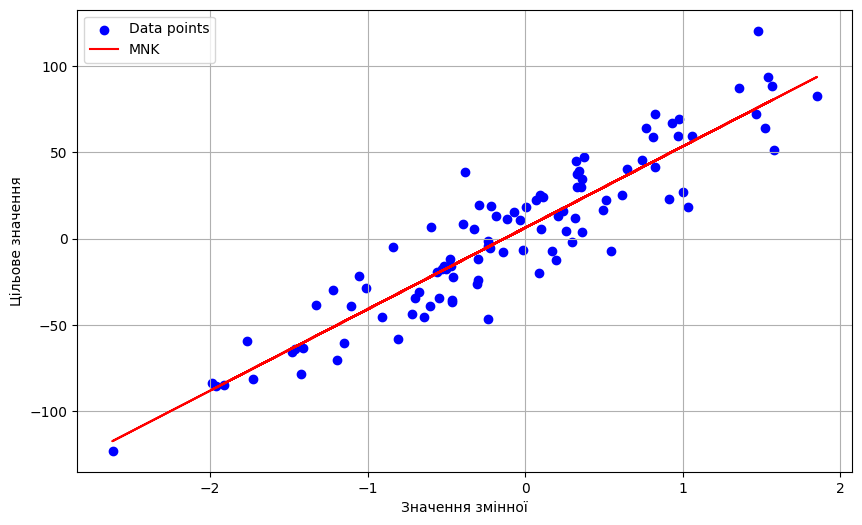

In [12]:
# Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], y, color='blue', label='Data points')
plt.plot(X[:, 0], predictions_MNK, color='red', label='MNK')
plt.xlabel('Значення змінної')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

# Недоліки МНК
Метод найменших квадратів (МНК) є одним з найпопулярніших підходів до оцінки параметрів у лінійній регресії. Однак, незважаючи на його широке використання та математичну зручність, у МНК є ряд обмежень та недоліків, які можуть вплинути на ефективність та адекватність моделі, особливо коли деякі з основних припущень порушуються:

- **Пошук оберненої матриці — складна операція з кубічною складністю** від кількості ознак. Якщо у вибірці тисячі ознак, то обчислення можуть стати занадто трудомісткими. Розв'язувати цю проблему можна шляхом використання чисельних методів оптимізації, наприклад, за допомогою методу градієнтного спуску. Але тоді чому його вже не використовувати для розвʼязку безпосередньо задачі :)

- **Матриця ознак може бути виродженою** (визначник дорівнює 0, означає, що немає оберненої матриці). Це відбувається у випадку мультиколінеарності ознак (можливість визначити одну змінну через іншу). Це призводить до великих стандартних помилок оцінок коефіцієнтів і може зробити окремі змінні статистично не значущими, хоча вони насправді є важливими. Це заважає сходитись і методі градієнтного спуску, але у випадку з МНК метод взагалі не працює.

- **Пошук аналітичного рішення може бути трудомістким**, за фактом це просто тільки для кількох простих алгоритмів. Є більш універсальний спосіб знайти мінімум функції витрат - *метод оптимізації "градієнтний спуск".


# Аналіз якості регресійної моделі

Розглянемо кілька стандартних метрик і методів для оцінки якості моделей регресії:

## 1. Коефіцієнт детермінації (R²)

$ R^2 $ є мірою частки дисперсії залежної змінної, яку можна передбачити за допомогою незалежних змінних. Цей показник надає інформацію про якість апроксимації та тому є показником того, наскільки добре модель зможе передбачити значення невідомих зразків. Формула для $ R^2 $ має наступний вигляд:

$$ R^2 = 1 - \frac{\text{Сума квадратів залишків (SSR)}}{\text{Загальна сума квадратів (TSS)}} $$

Де:
- **Сума квадратів залишків (SSR)**, також відома як сума квадратів різниць:
  $$ \text{SSR} = \sum_{i=1}^m (y^{(i)} - \hat{y^{(i)}})^2 $$
  Тут $ y^{(i)} $ – це фактичне значення, а $ \hat{y^{(i)}} $ – прогнозоване значення моделі для $ i $-го спостереження.

- **Загальна сума квадратів (TSS)**, яка вимірює загальну варіативність спостережуваних даних:
  $$ \text{TSS} = \sum_{i=1}^m (y^{(i)} - \bar{y})^2 $$
  Тут $ \bar{y} $ – це середнє значення спостережуваних даних $ y^{(i)} $.

### Інтерпретація
- $ R^2 $ має діапазон від 0 до 1, де 0 вказує на те, що модель не пояснює жодної варіабельності реагуючих даних навколо їхнього середнього значення, а 1 вказує, що вона пояснює всю варіабельність реагуючих даних навколо їхнього середнього значення.
- Значення $ R^2 $, близьке до 1, свідчить про гарну апроксимацію моделі.
- Негативні значення $ R^2 $, хоча можливі в деяких випадках (наприклад, коли модель гірша за просте прогнозування середнього значення даних), зазвичай вказують на проблеми в моделі.

### Скоригований $ R^2 $
У випадках, коли використовується кілька регресорів, може бути кращим використання скоригованого $ R^2 $, який адаптує статистику на основі кількості регресорів та розміру вибірки для запобігання перенавчанню:
$$ R^2_{\text{скоригований}} = 1 - \left(\frac{(1-R^2)(m-1)}{m-k-1}\right) $$
Тут $ m $ – кількість спостережень, а $ k $ – кількість незалежних змінних (регресорів, кількість колонок в Х).


![](https://www.datasciencecentral.com/wp-content/uploads/2021/10/2742052271.jpg)

## 2. Середня квадратична помилка (MSE) і середня абсолютна помилка (MAE)

**MSE** дуже чутлива до викидів, оскільки помилки підносяться до квадрату перед усередненням:

$$ MSE = \frac{1}{m} \sum_{i=1}^{m} (y^{(i)} - \hat{y^{(i)}})^2 $$

де $ y^{(i)} $ — реальні значення, $ \hat{y}_i $ — прогнозовані значення, $ m $ — кількість спостережень.

**MAE** є менш чутливою до викидів та оцінює середню величину абсолютних помилок:

$$ MAE = \frac{1}{m} \sum_{i=1}^{m} |y^{(i)} - \hat{y^{(i)}}| $$

## 3. Середньоквадратична логарифмічна помилка (RMSLE)

**RMSLE** використовується, коли більше значення помилок при великих значеннях змінної не є бажаними. Це часто зустрічається у випадках, коли інтерес становить порядок величини:

$$ RMSLE = \sqrt{\frac{1}{m} \sum_{i=1}^{m} (\log(y^{(i)} + 1) - \log(\hat{y^{(i)}} + 1))^2} $$

## 4. Тест на статистичну значимість коефіцієнтів

Застосування t-тесту для коефіцієнтів моделі дозволяє зрозуміти, чи є кожен коефіцієнт статистично значущим. Значущий коефіцієнт свідчить про те, що зміна незалежної змінної має суттєвий вплив на залежну змінну при контролі інших факторів.

Доступний тест на стат значущість коефіцієнтів тут: https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html

## 5. Діагностика залишків

Аналіз резидуалів може допомогти виявити проблеми з гетероскедастичністю, автокореляцією, нелінійністю та впливом викидів. Графічний аналіз, такий як графік резидуалів проти прогнозованих значень або часу, може виявити потенційні проблеми, які потребують подальшого розгляду або коригування моделі.


# Loss vs Evaluation metric


**Loss function** - частина моделі. Вона впливає на те, як у моделі будуть враховуватися помилки. Щоб виконувати градієнтний спуск, ми диференціюємо Loss function. Часто хочеться, щоб Loss function була диференційована та опукла.

**Метрика оцінки якості** може і збігатися з, і відрізнятися від Loss function. Метрик може бути кілька: головна і допоміжні. Вони потрібні для того, щоб оцінити якість моделі. Метрики не беруть участі в процесі оптимізації.

Оцінимо якість нашої моделі, побудованої з допомогою МНК:

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2 = r2_score(y, predictions_MNK)
rmse = mean_squared_error(y, predictions_MNK) ** 0.5
mae = mean_absolute_error(y, predictions_MNK)

print(f"R² score: {r2:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

R² score: 0.85
Root Mean Squared Error: 17.67
Mean Absolute Error: 14.21


In [14]:
np.mean(y), np.std(y), np.min(y)

(np.float64(1.4356078478615077),
 np.float64(46.11025462073194),
 np.float64(-122.70386498880775))

Проведемо діагностику залишків.

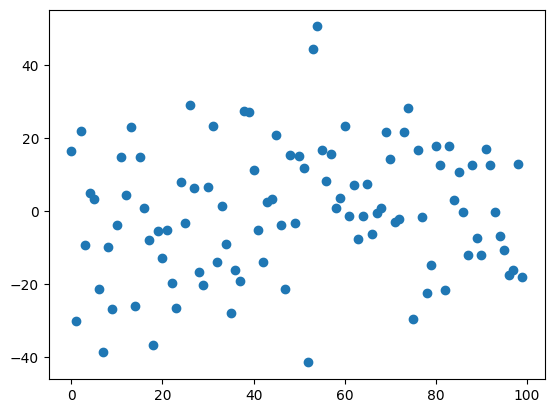

In [15]:
errors = y - predictions_MNK
plt.plot(errors, 'o');

Залишки виглядають гомоскедастично.

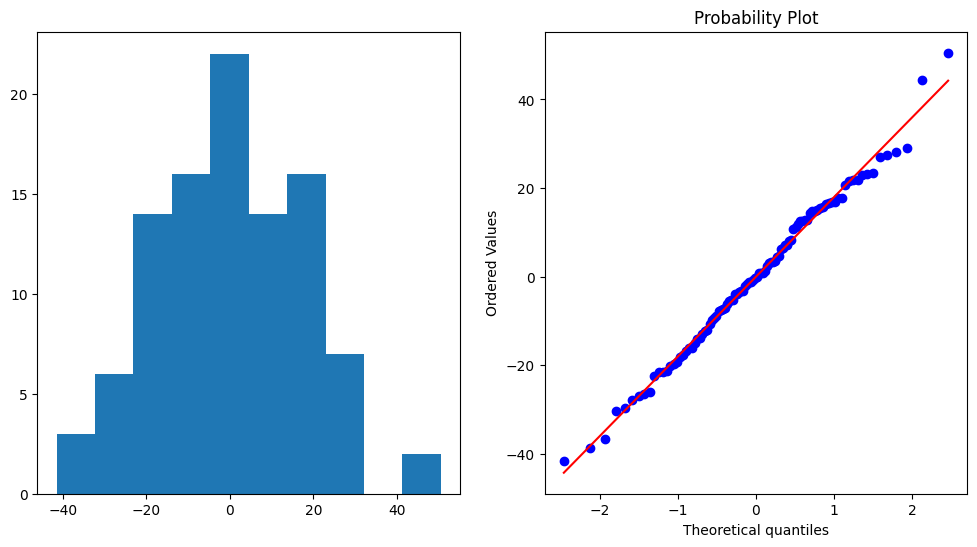

In [16]:
from scipy.stats import probplot

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.hist(errors)
plt.subplot(1,2,2)
probplot(errors, dist='norm', plot=plt);

З натяжкою, але розподіл залишків близький до нормального.

# Градієнтний спуск

Градієнтний спуск — це метод оптимізації, який використовується для мінімізації функцій. У випадку машинного навчання - це функція витрат.Основна ідея полягає в оновленні параметрів моделі в напрямку, який зменшує функцію втрат.

## Оновлення коефіцієнтів

Нехай ми маємо функцію втрат $ L(\theta) $, де $ \theta $ вектор параметрів моделі. Градієнтний спуск оновлює кожен параметр $ \theta_j $ вектора параметрів за формулою:

$$
\theta_j := \theta_j - \alpha \frac{\partial L}{\partial \theta_j}
$$

де:
- $ \alpha $ — це швидкість навчання (learning rate), яка контролює розмір кроку на кожній ітерації.
- $ \frac{\partial L}{\partial \theta_j} $ — часткова похідна функції втрат $ L $ відносно параметра $ \theta_j $, яка вказує напрямок найшвидшого зростання функції.
Це оновлення вагів виконується одночасно для всіх значень $ j = 0, ..., n $, де $ n $ - кількість ознак.

## Конкретно як обчислюються коефіцієнти

Нагадаємо як виглядає наша кост функція
$$ L(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2
\\
= \frac{1}{2m} [(h_\theta(x^{(1)}) - y^{(1)})^2 + (h_\theta(x^{(2)}) - y^{(2)})^2 + ... + (h_\theta(x^{(m)}) - y^{(m)})^2]   $$

де $x^{(i)}$ - це $i$-ий елемент набору даних, а
$$ h_\theta(x^{(i)}) = \theta_0 + \theta_1 x_1^{(i)} + \theta_2 x_2^{(i)} + ... + \theta_n x_m^{(i)} = 1 \theta_0 + \theta_1 x_1^{(i)} + \theta_2 x_2^{(i)} + ... + \theta_n x_m^{(i)} = \sum_{i=0}^n\theta_i x_i^{(i)}$$

де $n$ - кількість ознак (колонок в даних), $m$ - кількість екземплярів даних (рядків в даних, записів).

Похідна функції витрат для пари тренувального екземпляра $(x,y)$ виглядатиме так:
$$ \frac{\partial L}{\partial \theta_j} = \frac{\partial }{\partial \theta_j}\frac{1}{2m} (h_\theta(x) - y)^2  $$

$$ = \frac{1}{2m} \cdot 2 \cdot (h_{\theta}(x) - y) \cdot \frac{\partial}{\partial \theta_j} (h_{\theta}(x) - y) $$

$$ = \frac{1}{m} (h_{\theta}(x) - y) \cdot \frac{\partial}{\partial \theta_j} \left( \sum_{i=0}^n \theta_i x_i - y \right) $$

$$ = \frac{1}{m} (h_{\theta}(x) - y) x_j $$

Для одного тренувального прикладу тоді маємо правило оновлення вагів:
$$ \theta_j := \theta_j + \alpha (y^{(i)} - h_{\theta}(x^{(i)})) x_j^{(i)} $$

$\alpha$ - вже містить $1/m$, адже це просто константа. Тож, насправді в цих формулах можемо опустити $1/m$.

Ми вивели правило МНК, коли був лише один навчальний приклад. Є два способи змінити цей метод для навчального набору з кількох прикладів. Перший - замінити його за таким алгоритмом:

$$ \text{Повторювати до збіжності \{ } $$
$$ \theta_j := \theta_j + \alpha \sum_{i=1}^m (y^{(i)} - h_{\theta}(x^{(i)})) x_j^{(i)} \quad (\text{для кожного } j) $$
$$ \} $$

Цей метод переглядає кожен приклад у всьому навчальному наборі на кожному кроці та називається full batch gradient descent ("повнопакетним" градієнтним спуском).

Візуалізувати процес градієнтного спуску можна наступним чином

![](https://miro.medium.com/v2/resize:fit:1200/format:webp/1*lYpF8xJ3TiDoq461I0AcOQ.jpeg)



## Процес градієнтного спуску

1. **Ініціалізація**: Спочатку параметри $ \theta $ ініціалізуються довільно.
2. **Розрахунок градієнту**: Обчислюється градієнт функції втрат, $ \nabla_\theta L $, який містить часткові похідні для всіх параметрів.
3. **Оновлення параметрів**: Параметри оновлюються відповідно до формули оновлення.
4. **Повторення**: Кроки 2 і 3 повторюються, поки не буде досягнуто критеріїв зупинки, таких як максимальна кількість ітерацій, мінімальна зміна функції втрат між ітераціями або задовільна точність моделі.

## Візуалізація роботи градієнтного спуску

![](https://miro.medium.com/v2/resize:fit:1358/1*AsfV2NelG1Ta5F-0kr727w.gif)

Ще ліпше візуально зрозуміти, як працює град. спуск можна з наступним інструментом - https://github.com/lilipads/gradient_descent_viz.

### Потенційні проблеми градієнтного спуску

Незважаючи на гнучкість, градієнтний спуск має декілька потенційних проблем:
- **Застрягання в локальних мінімумах**: Для нелінійних функцій втрат градієнтний спуск може застрягти в локальних мінімумах замість глобального мінімума.

![](https://miro.medium.com/v2/resize:fit:1007/1*pEwSSEuZYZH2HsVdW0PGzg.png)
- **Залежність від розміру кроку (швидкості навчання)**: Вибір надто маленького кроку може призвести до повільного навчання, тоді як надто великий крок може призвести до коливань навколо мінімуму або навіть розбіжності.
- **Масштабування даних**: Неналежне масштабування ознак може ускладнити збіжність.


In [17]:
#y_hat = b + x*m

In [18]:
# Градієнтний спуск
def full_batch_gradient_descent(X, y, lr=0.1, epochs=100):
    m, b = 0.0, 0.0  # Початкові параметри
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = m * X[:, 0] + b
        error = y_pred - y
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, X[:, 0])
        b_gradient = (2/n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, errors

m, b, errors = full_batch_gradient_descent(X, y, lr=0.1, epochs=1000)
predictions_fbgd = m * X[:, 0] + b

m, b

(np.float64(47.13323966963204), np.float64(6.330230641053942))

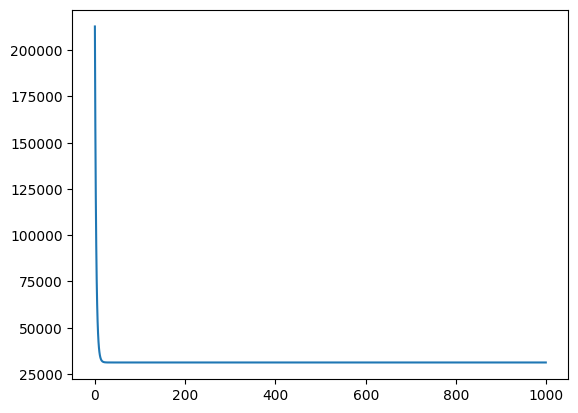

In [19]:
plt.plot(errors);

Є альтернатива повнопакетному градієнтному спуску, яка також добре працює. Розглянемо наступний алгоритм:


$ \text{Loop till convergence \{ } $

$  \quad \text{for i = 1 to m},  \{$

$  \quad \quad \theta_j := \theta_j + \alpha  (y^{(i)} - h_{\theta}(x^{(i)})) x_j^{(i)} \quad (\text{для кожного } j) \\
\quad\}$

$ \} $



У цьому алгоритмі ми кілька разів проходимо через навчальний набір даних, і кожного разу, коли ми зустрічаємо навчальний приклад, ми оновлюємо параметри відповідно до градієнта помилки по відношенню до цього одного навчального прикладу. Цей алгоритм називається стохастичним градієнтним спуском (також інкрементним градієнтним спуском) - Stochastic Gradient Descent.

Тоді як full-batch градієнтний спуск має просканувати весь навчальний набір перед тим, як зробити єдиний крок — обчислювально дорога операція, якщо $m$ велике — **стохастичний** градієнтний спуск може почати робити прогрес відразу ж, і продовжує робити прогрес з кожним прикладом, на який він дивиться.

Часто стохастичний градієнтний спуск наближається до мінімуму набагато швидше, ніж full-batch. Щоправда варто зауважити, що він може ніколи не «збігтися» до мінімуму, і параметри продовжуватимуть осцилювати навколо мінімуму $ L(\theta)$; але на практиці більшість значень поблизу мінімуму будуть досить гарними наближеннями до справжнього мінімуму.

З цих причин, особливо коли навчальний набір великий, стохастичний градієнтний спуск часто вважається переважнішим за full-batch.

In [20]:
def stochastic_gradient_descent(X, y, lr=0.1, epochs=100):
    m, b = 0.0, 0.0  # Initial parameters
    n = len(y)
    for _ in range(epochs):
        for i in range(n):
            x_i = X[i, 0]  # Assuming X is a 2D array with one feature column
            y_i = y[i]
            y_pred_i = m * x_i + b
            error_i = y_pred_i - y_i
            m_gradient = 2 * error_i * x_i
            b_gradient = 2 * error_i
            m -= lr * m_gradient
            b -= lr * b_gradient
    return m, b

m, b = stochastic_gradient_descent(X, y, lr=0.1, epochs=5000)
predictions_sgd = m * X[:, 0] + b

In [21]:
m, b

(np.float64(51.11531322853015), np.float64(-0.37705521828291877))

На практиці вам ніколи не доведеться самостійно реалізовувати жоден з вищезазначених методів. Ви можете використовувати бібліотеку, таку як `scikit-learn`, щоб зробити це за вас. До слова, sklearn реалізує саме МНК і в цьому Ви можете переконатись самостійно, звернушвшись до сорс коду

https://github.com/scikit-learn/scikit-learn/blob/872124551/sklearn/linear_model/_base.py#L434

In [22]:
!pip install scikit-learn --quiet

In [23]:
from sklearn.linear_model import LinearRegression

# Модель лінійної регресії засобами Scikit-learn (МНК)
lin_reg = LinearRegression()


In [24]:
lin_reg

LinearRegression()

In [25]:
lin_reg.fit(X, y)

LinearRegression()

In [26]:
lin_reg.coef_, lin_reg.intercept_

(array([47.13323967]), np.float64(6.330230641053946))

In [27]:
predictions_sklearn = lin_reg.predict(X)

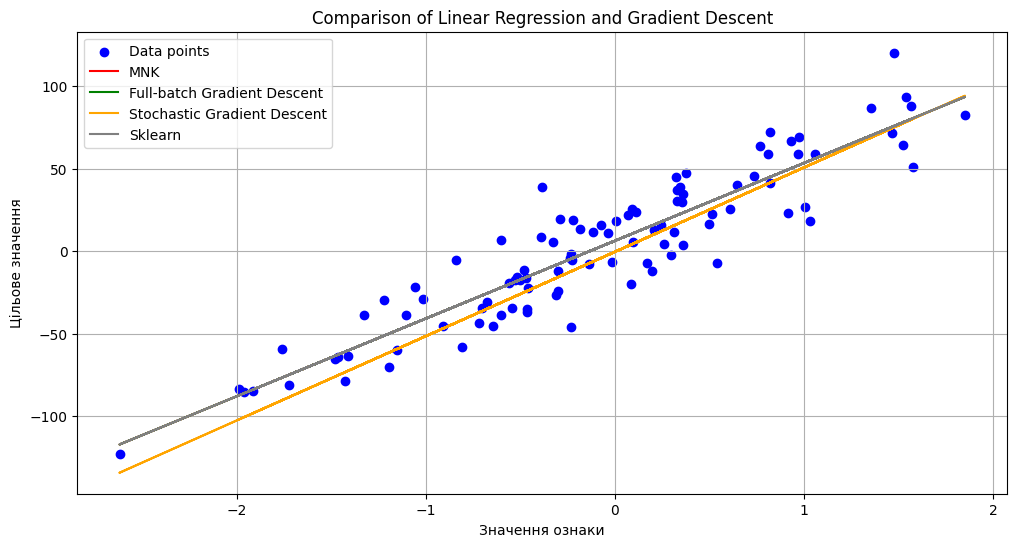

In [28]:
# Візуалізація результатів
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], y, color='blue', label='Data points')
plt.plot(X[:, 0], predictions_MNK, color='red', label='MNK')
plt.plot(X[:, 0], predictions_fbgd, color='green', label='Full-batch Gradient Descent')
plt.plot(X[:, 0], predictions_sgd, color='orange', label='Stochastic Gradient Descent')
plt.plot(X[:, 0], predictions_sklearn, color='grey', label='Sklearn')
plt.title('Comparison of Linear Regression and Gradient Descent')
plt.xlabel('Значення ознаки')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()


In [29]:
print('Коефіцієнти з МНК: ', MNK_coefs)
print('Коефіцієнти з стохаст. град. спуску: ', b, m)
print('Коефіцієнти з sklearn: ', lin_reg.intercept_, lin_reg.coef_)

Коефіцієнти з МНК:  [ 6.33023064 47.13323967]
Коефіцієнти з стохаст. град. спуску:  -0.37705521828291877 51.11531322853015
Коефіцієнти з sklearn:  6.330230641053946 [47.13323967]


Як бачимо, моделі на цьому прикладі вийшли  не дуже однакові. Для досколаного порівняння ми зазвичай порівнюємо на метриках.

In [32]:
print('RMSE МНК: ', rmse)

rmse_sgd = mean_squared_error(y, predictions_sgd) ** 0.5
print('RMSE стохаст. град. спуску: ', rmse_sgd)

rmse_sklearn = mean_squared_error(y, predictions_sklearn) ** 0.5
print('RMSE sklearn: ', rmse_sklearn)

RMSE МНК:  17.669663315551773
RMSE стохаст. град. спуску:  19.387378890948685
RMSE sklearn:  17.66966331555177




---

### ✅ У чому різниця між градієнтним спуском і стохастичним градієнтним спуском:

#### 🔹 **Градієнтний спуск (Batch Gradient Descent):**

* На кожному кроці він **використовує всі дані одразу**, щоб порахувати, як треба змінити ваги моделі.
* Це дає **точне, але повільне** оновлення.
* Підходить для невеликих наборів даних.

**Уяви, що ти хочеш дізнатись середній зріст людей — і міряєш усіх одразу, перш ніж робити висновок.**

---

#### 🔹 **Стохастичний градієнтний спуск (SGD):**

* На кожному кроці бере **один випадковий приклад із даних**, і на його основі оновлює ваги.
* Це швидко, але результат трохи «скаче» (є шум).
* Добре працює з великими даними.

**Уяви, що ти міряєш одну людину й одразу робиш висновок — швидко, але не дуже точно.**

---

#### 🔸 Міні-батч градієнтний спуск:

* Компромісний варіант: бере **не всі дані, але й не одну точку**, а невелику групу (наприклад, 32 приклади).
* Він майже такий точний, як звичайний градієнтний спуск, але набагато швидший.

---

### 📊 Порівняння:

| Метод                       | Дані на крок  | Швидкість   | Точність       | Використання    |
| --------------------------- | ------------- | ----------- | -------------- | --------------- |
| Batch Gradient Descent      | Усі           | Повільна    | Висока         | Невеликі набори |
| Stochastic Gradient Descent | 1 приклад     | Дуже швидка | Низька (скаче) | Великі дані     |
| Mini-batch Gradient Descent | 32–128 прикл. | Швидка      | Добра          | Найчастіше      |

---

Якщо хочеш — можу показати це на графіку або коді.


# Вибір Learning rate

![](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*An4tZEyQAYgPAZl396JzWg.png)

Вибір оптимального рівня навчання, або "learning rate" (швидкість навчання), для градієнтного спуску в моделях лінійної регресії є критичним, оскільки це визначає швидкість збіжності алгоритму до мінімуму функції втрат. Занадто малий learning rate може призвести до дуже повільної конвергенції, тоді як занадто великий може спричинити коливання навколо мінімуму або навіть розбіжність. Ось кілька підходів для вибору адекватного learning rate:

## 1. Експериментальний підхід ("trial and error")

Найпростіший спосіб визначення оптимального learning rate - це експериментування. Можна запустити градієнтний спуск декілька разів з різними значеннями швидкості навчання та вибрати той, який найшвидше зменшує функцію втрат без ознак розбіжності.

## 2. Використання графіків зменшення втрат

Метод полягає у візуалізації зміни функції втрат у залежності від кількості ітерацій при різних learning rates. Якість learning rate можна оцінити за тим, наскільки швидко функція втрат зменшується і чи відбувається стабілізація (збіжність).

## 3. Learning rate decay

Цей метод передбачає поступове зменшення швидкості навчання протягом тренування. Починаючи з вищого learning rate для швидкого прогресу на початку, learning rate поступово знижується, щоб допомогти алгоритму стабілізуватися близько оптимального рішення. Часто використовуються такі схеми як експоненційний decay, кроковий decay або інші адаптивні методи.

## 4. Адаптивні методи оптимізації

Алгоритми, такі як Adam, RMSprop або Adagrad, автоматично регулюють learning rate для кожного параметра. Ці методи забезпечують індивідуальне регулювання швидкості оновлення параметрів на основі обчислень попередніх градієнтів, що може підвищити ефективність градієнтного спуску. Про них буде в секції про нейронні мережі.

